# الطالبه / الوسيمه رزق العنزي 
# الرقم الاكاديمي / 421009982

In [2]:
#Connect Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#Load The Data
AB_NYC_2019 = pd.read_csv("/content/drive/MyDrive/H.W1_Data mining/AB_NYC_2019.csv")
#print(AB_NYC_2019)
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#checking what are the variables here:
AB_NYC_2019.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#basic information about the dataset
AB_NYC_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#just a sanity check:
#looks all the property ids are different and each listings are different here!

AB_NYC_2019['id'].nunique()

48895

# Show, which attributes (variables), have missing values

In [8]:
#check the missing values in the dataset
print(AB_NYC_2019.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


# Print out on the screen the total number of unique values of the categorical attributes: (minimum_nights, neighbourhood, room_type, price number_of_reviews, availability_365)


In [9]:
minimum_nights=AB_NYC_2019['minimum_nights'].nunique()
print(f'the total number of unique values in minimum_nights : {minimum_nights}')

neighbourhood=AB_NYC_2019['neighbourhood'].nunique()
print(f'the total number of unique values in neighbourhood : {neighbourhood}')

room_type=AB_NYC_2019['room_type'].nunique()
print(f'the total number of unique values in room_type : {room_type}')

price=AB_NYC_2019['price'].nunique()
print(f'the total number of unique values in price : {price}')

number_of_reviews=AB_NYC_2019['number_of_reviews'].nunique()
print(f'the total number of unique values in number_of_reviews : {number_of_reviews}')

availability_365=AB_NYC_2019['availability_365'].nunique()
print(f'the total number of unique values in availability_365 :{availability_365}')

the total number of unique values in minimum_nights : 109
the total number of unique values in neighbourhood : 221
the total number of unique values in room_type : 3
the total number of unique values in price : 674
the total number of unique values in number_of_reviews : 394
the total number of unique values in availability_365 :366


# Print out unique values in neighbourhood_group with their frequencies

In [10]:
# count of unique values 
print(AB_NYC_2019['neighbourhood_group'].nunique())


# value counts of each unique value
print(AB_NYC_2019['neighbourhood_group'].value_counts())

5
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


# Plot the distribution of categorical attribute room type (In other words, visualize the categorical values for the room_type in a histogram by plotting the percentage of every room type). 

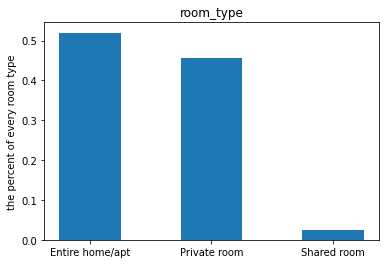

In [11]:
# obtain a bar chart of the proportion of Airbnb listings in room_type

s = AB_NYC_2019.room_type.value_counts()/AB_NYC_2019.shape[0]
ls = list(s)
lables = s.index
plt.bar(lables,ls,width = 0.51)
plt.ylabel('the percent of every room type')
plt.title('room_type')
plt.show()

# Plot in a Pie Chart the distribution of neighbourhood_group using availability_365 attribute (with y='availability_365'). 

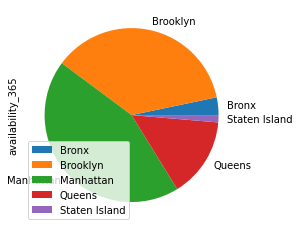

In [12]:
AB_NYC_2019.groupby(['neighbourhood_group']).sum()[:5].plot(kind='pie',y='availability_365')

# Check whether price and number_of_reviews have outliers or not 

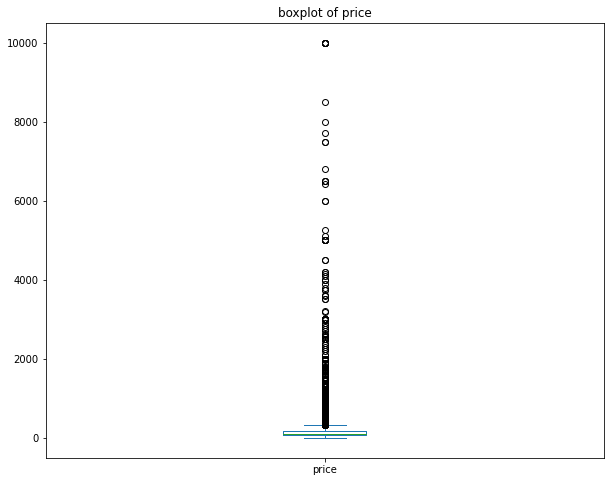

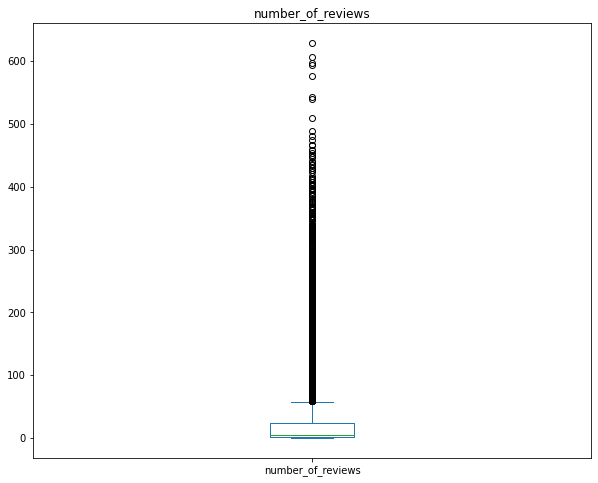

In [13]:
#we can see the presence of many outliers in price and number_of_reviews

AB_NYC_2019['price'].plot(kind='box',figsize=(10,8),title='boxplot of price')
plt.show()



AB_NYC_2019['number_of_reviews'].plot(kind='box',figsize=(10,8),title='number_of_reviews')
plt.show()


# Plot the distribution of the categorical attribute room type vs 
# calculated_host_listings_count (In other words, visualize the categorical values for the room_type in a histogram, whose Y – Axis is the calculated_host_listings_count)

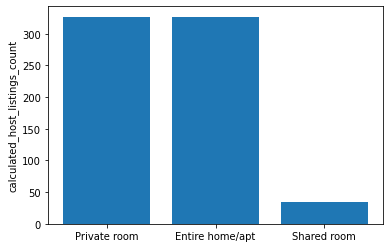

In [14]:
plt.bar(x=AB_NYC_2019['room_type'],height=AB_NYC_2019['calculated_host_listings_count'])
plt.ylabel('calculated_host_listings_count')
plt.show()

# Since (reviews_per_month) is continuous, the mean will be used to handle missed data in this attribute.


In [15]:
AB_NYC_2019_new = AB_NYC_2019.copy()

In [16]:
AB_NYC_2019_new.reviews_per_month=AB_NYC_2019_new.reviews_per_month.fillna(AB_NYC_2019_new.reviews_per_month.mean())

In [17]:
#AB_NYC_2019_new.isnull().sum()
AB_NYC_2019_new['reviews_per_month'].isnull().values.any() #looks the null values are removed!

False

# After showing this in our code (filling null values of reviews_per_month by mean), we change our mind because we discover that the mean is not suitable (note we are talking about number of reviews per month). Therefore, we decided to fill the original null values by zero – instead of mean. Show this change in your code

In [18]:
AB_NYC_2019['reviews_per_month'] = AB_NYC_2019['reviews_per_month'].fillna(0)

In [19]:
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# To handle missed data of both name and host_name, which are categorical, a new class called (global constant) will be used.


In [20]:
AB_NYC_2019['name']=AB_NYC_2019['name'].fillna('global constant')

In [21]:
AB_NYC_2019['host_name']=AB_NYC_2019['host_name'].fillna('global constant')

In [22]:
AB_NYC_2019.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Check whether the category values of (room_type), is consistent. If they are inconsistent, unify categories.


In [23]:
#There are no values inconsistent
AB_NYC_2019.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

# Since the (room_type) variable has only 3 levels ("Entire home/apt", "Private room","Shared room"), you decided to convert the variable values into a numeric discrete attribute with the value 0 for "Entire home/apt", the value 1 for "Private room" and the value 2 for "Shared room".

In [24]:
cleanup_nums={'room_type': {'Entire home/apt':0,'Private room':1,'Shared room':2},}

In [25]:
AB_NYC_2019=AB_NYC_2019.replace(cleanup_nums)

In [26]:
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0


# Use Z-score to standardize/normalize price. Show your data after adding the Price Z score. Print out price with its Z-Score values (just print a sample not all values).


In [27]:
#getting the summary statistics for price columns
AB_NYC_2019.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [28]:
AB_NYC_2019.price.mean()

152.7206871868289

In [29]:
AB_NYC_2019.price.std()

240.15416974718727

In [30]:
AB_NYC_2019['zscore']=(AB_NYC_2019.price-AB_NYC_2019.price.mean())/ AB_NYC_2019.price.std()
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zscore
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365,-0.015493
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355,0.300970
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,NaN,0.00,1,365,-0.011329
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194,-0.265332
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0,-0.302808


In [31]:
#For confirmation
(149 - 152.7206871868289)/240.15416974718727

-0.015492911036047038

# You decided to drop last_review variable because we are not going to use it.

In [32]:
#drop unnecessary column
AB_NYC_2019 = AB_NYC_2019.drop('last_review',1)
AB_NYC_2019.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,zscore
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,0.21,6,365,-0.015493
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,0.38,2,355,0.300970
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,0.00,1,365,-0.011329
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,4.64,1,194,-0.265332
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,0.10,1,0,-0.302808


# Print out Correlation matrix in terms of heatmap between all variables.

In [33]:
matrix=AB_NYC_2019.corr()
matrix

,id,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,zscore
id,1.000000,0.588290,-0.003125,0.090908,0.066020,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468,0.010619
host_id,0.588290,1.000000,0.020224,0.127055,0.090451,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492,0.015309
latitude,-0.003125,0.020224,1.000000,0.084788,0.006481,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983,0.033939
longitude,0.090908,0.127055,0.084788,1.000000,0.184341,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731,-0.150019
room_type,0.066020,0.090451,0.006481,0.184341,1.000000,-0.249350,-0.069792,0.002724,0.026606,-0.106055,0.022500,-0.249350
price,0.010619,0.015309,0.033939,-0.150019,-0.249350,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829,1.000000
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,-0.069792,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303,0.042799
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,0.002724,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028,-0.047954
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,0.026606,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732,-0.050564
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,-0.106055,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701,0.057472


In [34]:
matrix=AB_NYC_2019.corr()
print(matrix)

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
room_type                       0.066020  0.090451  0.006481   0.184341   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.180221  0.209783 -0.018758   0.138516   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   
zscore                          0.010619  0.015309  0.033939  -0.150019   

                        

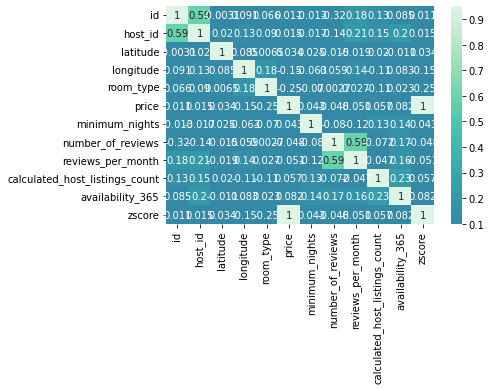

<Figure size 720x576 with 0 Axes>

In [35]:
# Check the correlation between numerical variables
sns.heatmap(data = matrix , annot=True , cmap ='mako' ,center=0 ,vmin=0.1  , vmax= 0.95 , cbar=True)
plt.figure(figsize=(10,8))
plt.show()


# Using the computed Z-score values for the price, write a code to guarantee that outliers in z-scores will be removed.Hint: to remove outlier, remove the Z-score values that are greater than 3 (on both sides) 


In [36]:
AB_NYC_2019[(AB_NYC_2019.zscore <-3) | (AB_NYC_2019.zscore >3) ]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,zscore
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,0,2000,30,30,0.33,11,0,7.692056
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,0,1300,5,28,0.31,4,297,4.777262
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,1,3000,7,0,0.00,1,365,11.856048
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,1,1300,1,0,0.00,1,0,4.777262
1414,634353,Luxury 1Bed with Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77428,-73.98594,0,1000,30,44,0.53,11,364,3.528064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48301,36186719,Private Bedroom in the Heart of Chelsea!,268920555,Terrence Jake,Manhattan,Chelsea,40.74531,-73.99454,1,999,30,0,0.00,1,270,3.523900
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,0,2999,30,0,0.00,1,222,11.851884
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,0,1999,30,0,0.00,1,270,7.687892
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,0,1369,1,0,0.00,1,349,5.064577


In [37]:
AB_NYC_2019_NO_outlier=AB_NYC_2019[(AB_NYC_2019.zscore >-3) & (AB_NYC_2019.zscore <3) ]
AB_NYC_2019_NO_outlier.shape

(48507, 16)

In [38]:
AB_NYC_2019 = AB_NYC_2019.drop(AB_NYC_2019[(AB_NYC_2019.zscore <-3) | (AB_NYC_2019.zscore >3)].index)
AB_NYC_2019

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,zscore
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,0.21,6,365,-0.015493
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,0.38,2,355,0.300970
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,0.00,1,365,-0.011329
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,4.64,1,194,-0.265332
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,0.10,1,0,-0.302808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,1,70,2,0,0.00,2,9,-0.344448
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,1,40,4,0,0.00,2,36,-0.469368
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,0,115,10,0,0.00,1,27,-0.157069
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,2,55,1,0,0.00,6,2,-0.406908


# Determine the price range in both Manhattan and Bronx (neighbourhood attribute). To Hint: do this, you have to plot price Distribution in every neighbourhood_group based on the neighbourhood (s) (in other words, plot neighbourhood (s) and price for each neighbourhood_group 

In [39]:
AB_NYC_2019['neighbourhood_group'].value_counts()

Manhattan        21378
Brooklyn         20020
Queens            5650
Bronx             1089
Staten Island      370
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


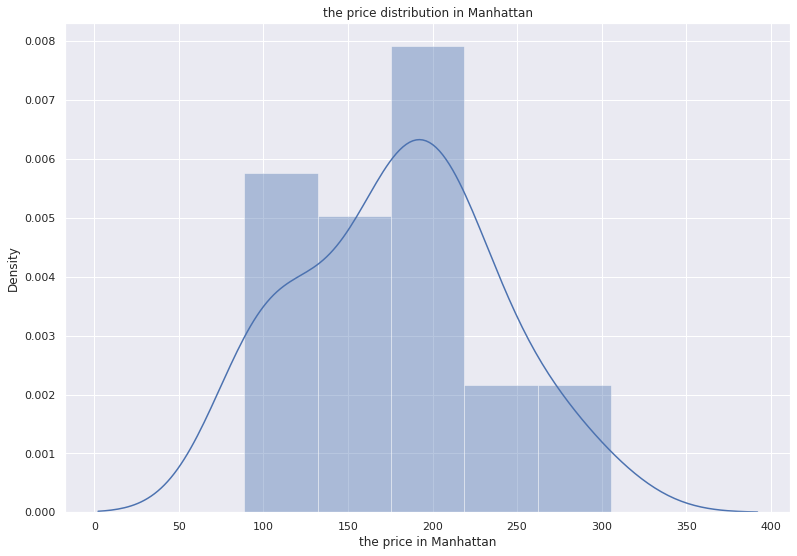

<Figure size 576x216 with 0 Axes>

In [46]:
AB_NYC_2019_test= AB_NYC_2019[AB_NYC_2019.neighbourhood_group == "Manhattan"][["neighbourhood","price"]]
e = AB_NYC_2019_test.groupby("neighbourhood").mean()
sns.distplot(e) 
sns.set(rc={'figure.figsize':(8,3)})       
plt.xlabel('the price in Manhattan')
plt.title('the price distribution in Manhattan')
plt.figure(figsize=(8,3))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


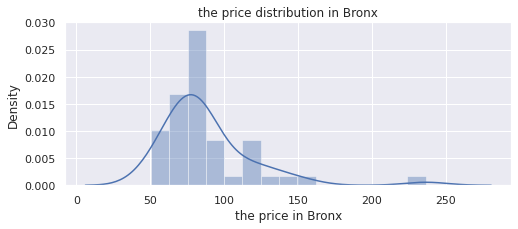

<Figure size 576x216 with 0 Axes>

In [47]:
AB_NYC_2019_test = AB_NYC_2019[AB_NYC_2019.neighbourhood_group == "Bronx"][["neighbourhood","price"]]
e = AB_NYC_2019_test.groupby("neighbourhood").mean()
sns.distplot(e)
sns.set(rc={'figure.figsize':(8,3)}) 
plt.xlabel('the price in Bronx')
plt.title('the price distribution in Bronx')
plt.figure(figsize=(8,3))
plt.show()